In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.worldometers.csv',index_col=0)

In [3]:
data.head()

,infected
date,
2020-01-23,845
2020-01-24,1317
2020-01-25,2015
2020-01-26,2800
2020-01-27,4581


In [4]:
data.tail()

,infected
date,
2020-03-08,109991
2020-03-09,114381
2020-03-10,118948
2020-03-11,126214
2020-03-12,134576


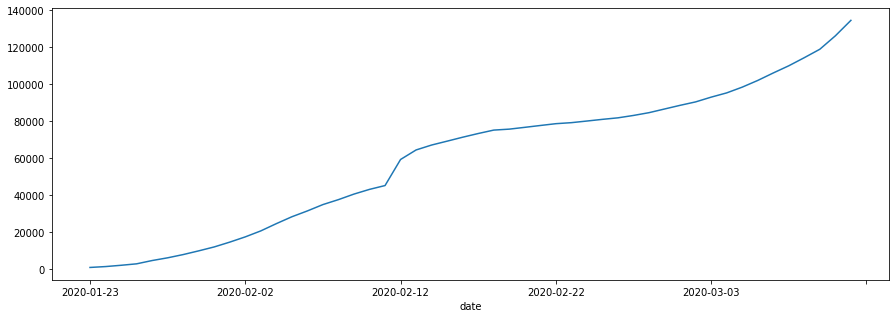

In [5]:
data.infected.plot(figsize=(15, 5))

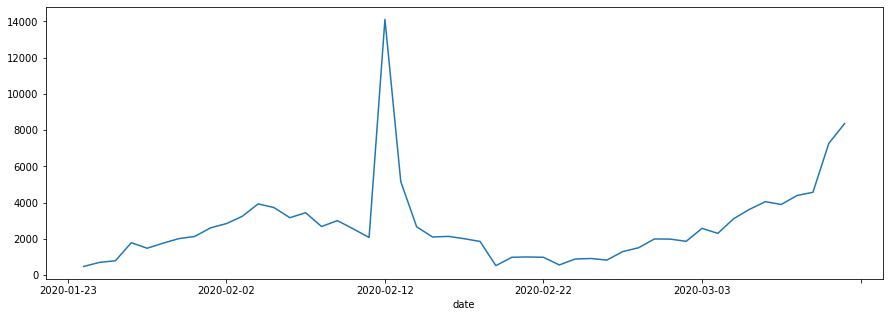

In [6]:
(data.infected - data.infected.shift(1)).plot(figsize=(15, 5))

In [7]:
from pyramid.arima import auto_arima

In [8]:
stepwise_model = auto_arima(data,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 1, 2); AIC=895.278, BIC=906.629, Fit time=1.167 seconds
Fit ARIMA: order=(0, 1, 0); AIC=901.036, BIC=904.819, Fit time=0.041 seconds
Fit ARIMA: order=(1, 1, 0); AIC=890.630, BIC=896.305, Fit time=0.281 seconds
Fit ARIMA: order=(0, 1, 1); AIC=893.840, BIC=899.515, Fit time=0.250 seconds
Fit ARIMA: order=(2, 1, 0); AIC=891.994, BIC=899.562, Fit time=0.511 seconds
Fit ARIMA: order=(1, 1, 1); AIC=891.545, BIC=899.112, Fit time=0.544 seconds
Fit ARIMA: order=(2, 1, 1); AIC=893.403, BIC=902.862, Fit time=0.932 seconds
Total fit time: 3.752 seconds


In [9]:
stepwise_model.aic()

890.6297482796131

In [10]:
stepwise_model.fit(data)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [11]:
predicted_days = 15
firstPredictionDay = datetime.datetime(2020,3,13)

In [12]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [13]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-03-13 - 140178
2020-03-14 - 144390
2020-03-15 - 147899
2020-03-16 - 151055
2020-03-17 - 154032
2020-03-18 - 156919
2020-03-19 - 159761
2020-03-20 - 162580
2020-03-21 - 165387
2020-03-22 - 168188
2020-03-23 - 170987
2020-03-24 - 173784
2020-03-25 - 176580
2020-03-26 - 179376
2020-03-27 - 182172
